In [17]:
import dtale as dt
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV,ElasticNetCV,PassiveAggressiveRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Plotly Graphing Libraries
from plotly.offline import init_notebook_mode, iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.graph_objs as go
import plotly
import plotly.express as px

## Machine Learning Libaries
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn import svm,metrics,tree,preprocessing,linear_model
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,mean_squared_error,recall_score,confusion_matrix,f1_score,roc_curve, auc
from keras import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import CSVLogger
from sklearn.neural_network import MLPClassifier
from dmba import classificationSummary

In [106]:
data=pd.read_csv('C:/Users/sourabh.chandel/Desktop/Supply.csv',encoding='latin-1')

In [107]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [108]:
data.isnull().sum()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [109]:
#Customer Full name column
data['Customer_full_name']=data['Customer Fname'].astype(str)+data['Customer Lname'].astype(str)

# Data Cleaning

In [110]:
# dropping unimportant columns according to business problem
data.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname',
         'Customer Lname','Latitude','Longitude','Product Description','Product Image','Order Zipcode',
         'shipping date (DateOrders)'],axis=1,inplace=True)

In [111]:
data.shape

(180519, 42)

In [112]:
data['Customer Zipcode']=data['Customer Zipcode'].fillna(0)

In [113]:
# Creating a new column for order date
data['order date (DateOrders)'].head()

0    1/31/2018 22:56
1    1/13/2018 12:27
2    1/13/2018 12:06
3    1/13/2018 11:45
4    1/13/2018 11:24
Name: order date (DateOrders), dtype: object

In [114]:
#Splitting Order date with year and days 
data['order_yr']= pd.DatetimeIndex(data['order date (DateOrders)']).year
data['order_month'] = pd.DatetimeIndex(data['order date (DateOrders)']).month
data['order_day'] = pd.DatetimeIndex(data['order date (DateOrders)']).weekday
data['order_hour'] = pd.DatetimeIndex(data['order date (DateOrders)']).hour

<AxesSubplot: >

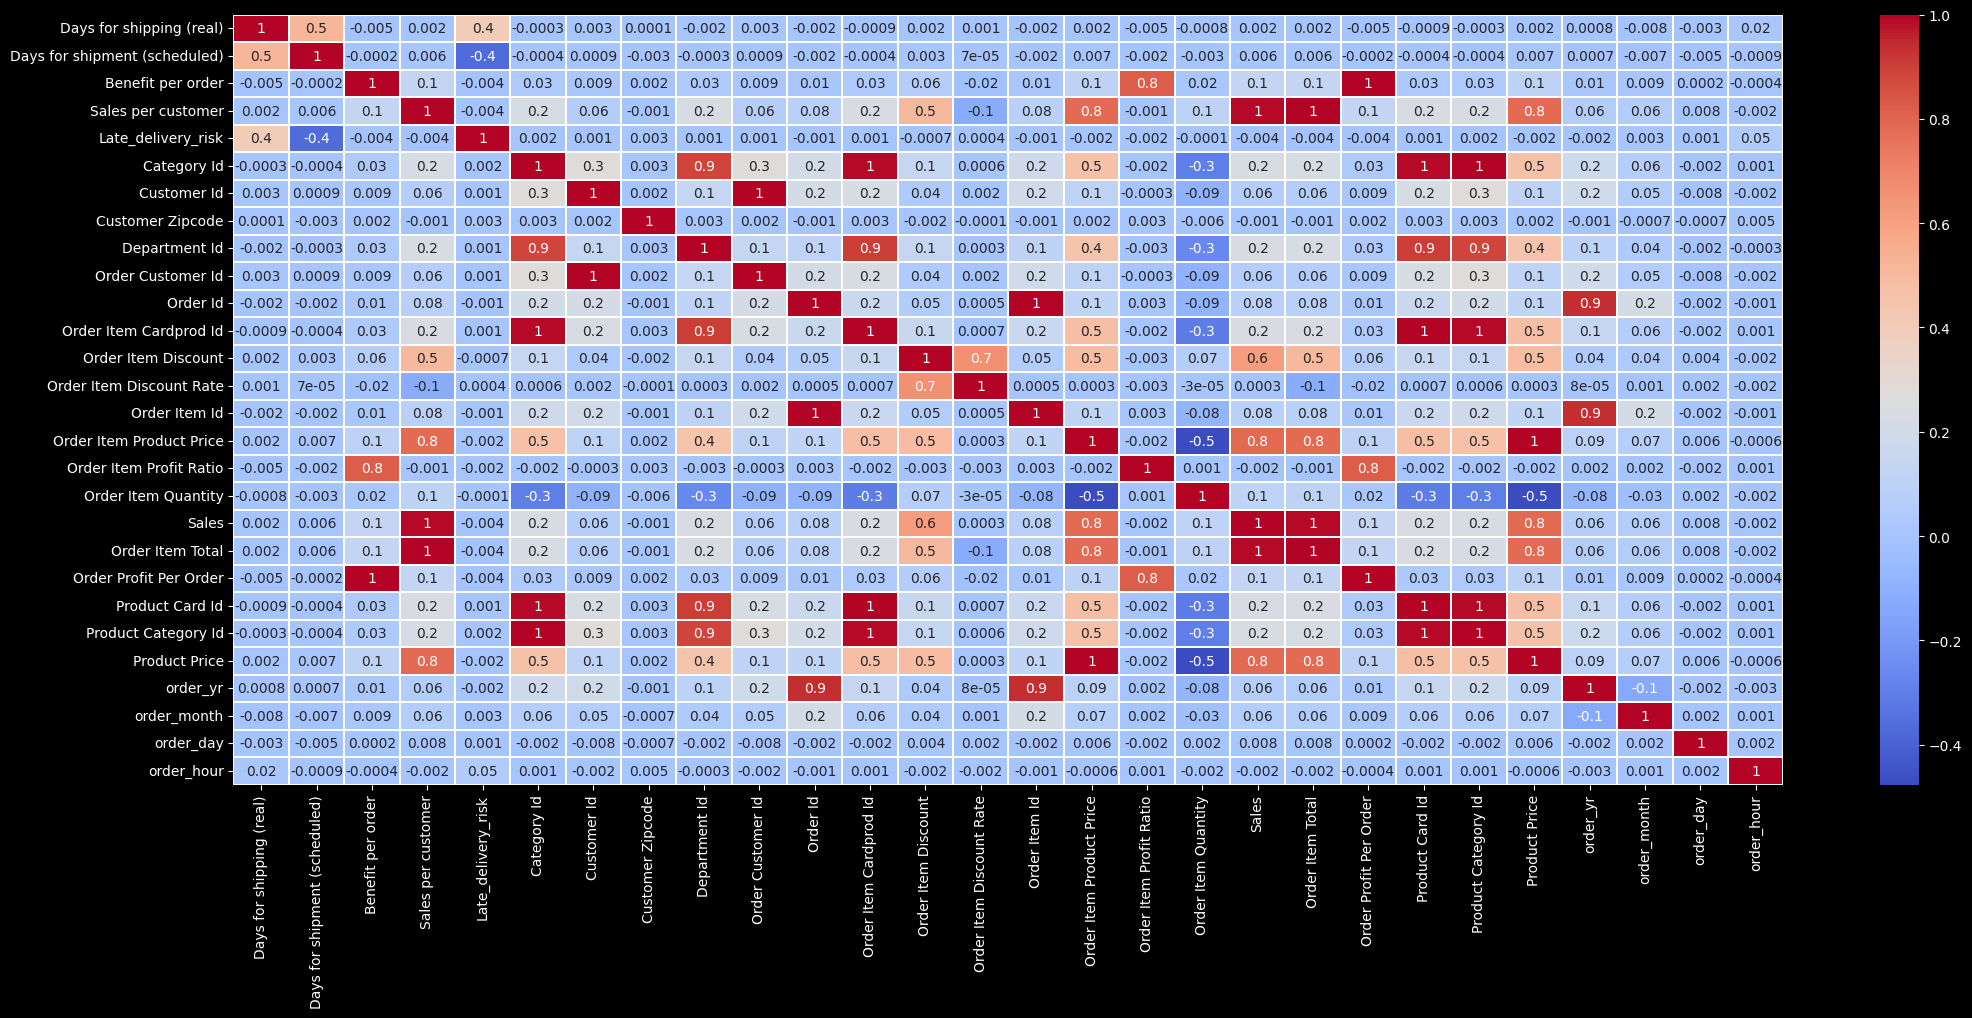

In [115]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(25,10))         # figsize
sns.heatmap(data.corr(),annot=True, linewidths=.3 ,fmt='.1g', cmap= 'coolwarm')

In [116]:
#Some products have negative benefits per order indicating that these benefits per order are costing to the company
loss = data[(data['Benefit per order']<0)]


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'LATAM'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Pacific Asia'),
  Text(3, 0, 'USCA'),
  Text(4, 0, 'Africa')])

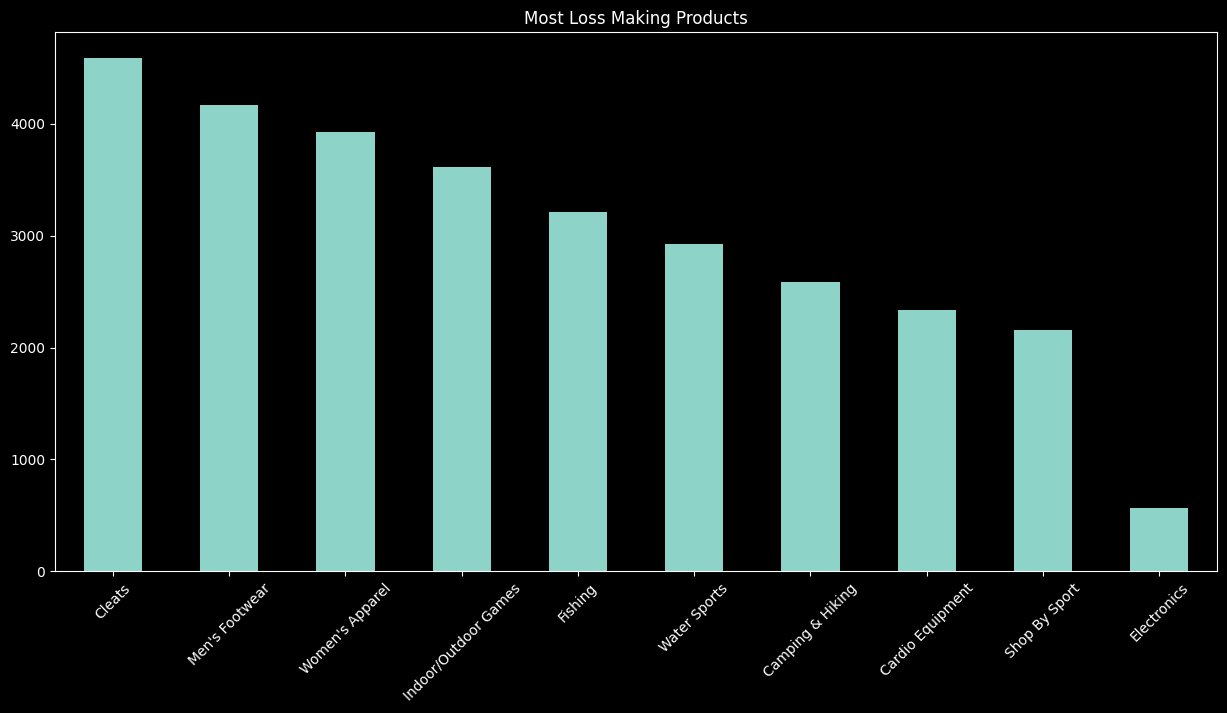

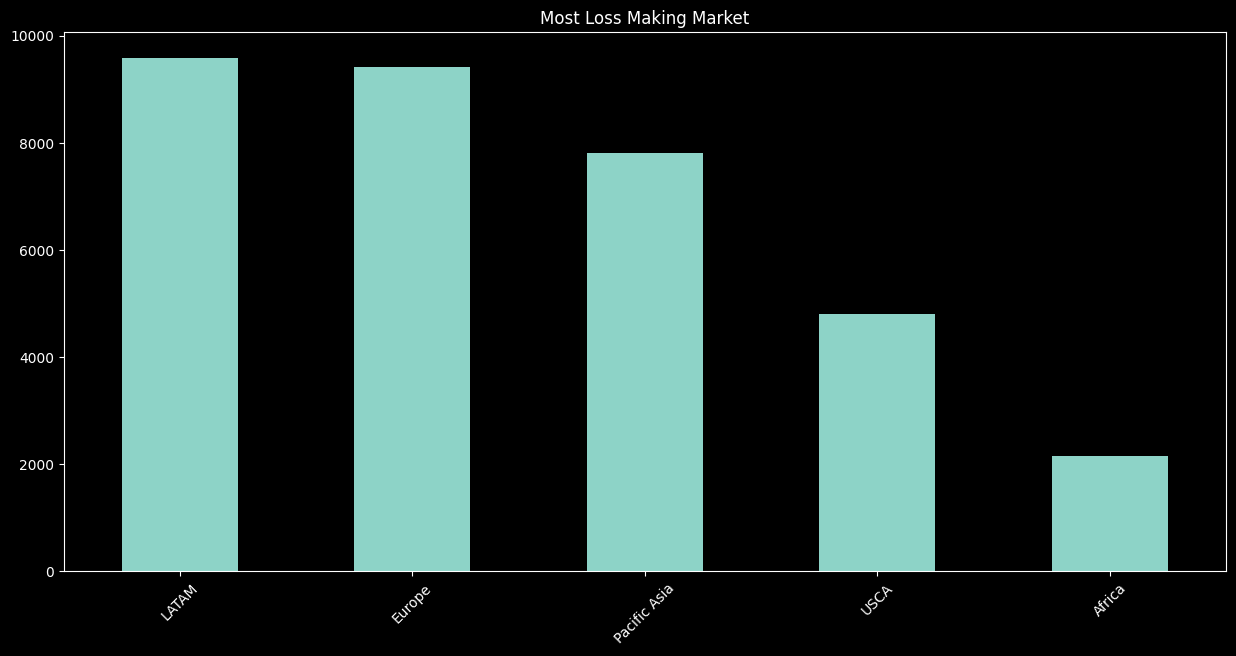

In [117]:
# Category that are making loss product
#dt.show(data)
plt.figure(1)
loss['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Products")
plt.xticks(rotation = 45)
plt.figure(2)
loss['Market'].value_counts().nlargest(10).plot.bar(figsize=(15,7), title="Most Loss Making Market")
plt.xticks(rotation = 45)

In [118]:
# order status as per payment 
status=data.groupby('Type')['Order Status'].value_counts()


In [119]:
fraud_region=data[(data['Order Status']=='SUSPECTED_FRAUD')]

In [120]:
plt.style.use("dark_background")
temp = fraud_region['Category Name'].value_counts().nlargest(10)
temp.iplot(kind='bar', xTitle = 'Category', yTitle = "Count", title = 'Count of Products with suspected fraud', color = '#FF0000')

In [121]:
# Data Modelling and Neural Networks
train_df = data.copy()

In [122]:
# creating binary encoding
train_df['fraud']=np.where(train_df['Order Status']=='SUSPECTED_FRAUD',1,0)
train_df['late_delivery']=np.where(train_df['Delivery Status'] == 'Late delivery', 1, 0)

In [123]:
train_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Id', 'Department Name', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Card Id', 'Product Category Id', 'Product Name',
       'Product Price', 'Shipping Mode', 'Customer_full_name', 'order_yr',
       'order_month', 'order_day', 'order_hour', 'fraud', 'late_delivery'],
 

In [124]:
#Removing identical columns after creating new columns
train_df.drop(['Delivery Status','Late_delivery_risk','Order Status','order date (DateOrders)'], axis=1, inplace=True)

In [125]:
#Getting all the object type variable and encode it
object_columns = list(train_df.select_dtypes(include=['object']).columns)
print(object_columns)

['Type', 'Category Name', 'Customer City', 'Customer Country', 'Customer Segment', 'Customer State', 'Department Name', 'Market', 'Order City', 'Order Country', 'Order Region', 'Order State', 'Product Name', 'Shipping Mode', 'Customer_full_name']


In [153]:
le=preprocessing.LabelEncoder()
#Convert categorical columns into numeric
train_df['Category Name']= le.fit_transform(train_df['Category Name'])
train_df['Type']= le.fit_transform(train_df['Type'])
train_df['Market']            = le.fit_transform(train_df['Market'])
train_df['Product Name']      = le.fit_transform(train_df['Product Name'])
train_df['Customer Segment']  = le.fit_transform(train_df['Customer Segment'])
train_df['Customer State']    = le.fit_transform(train_df['Customer State'])
train_df['Order Region']      = le.fit_transform(train_df['Order Region'])
train_df['Order City']        = le.fit_transform(train_df['Order City'])
train_df['Category Name']     = le.fit_transform(train_df['Category Name'])
train_df['Customer City']     = le.fit_transform(train_df['Customer City'])
train_df['Customer Country']     = le.fit_transform(train_df['Customer Country'])
train_df['Department Name']   = le.fit_transform(train_df['Department Name'])
train_df['Order State']       = le.fit_transform(train_df['Order State'])
train_df['Shipping Mode']     = le.fit_transform(train_df['Shipping Mode'])
train_df['Order Country']     = le.fit_transform(train_df['Order Country'])
train_df['Customer_full_name']    = le.fit_transform(train_df['Customer_full_name'])

# Preparing data to Neural Network
### Creating a Validation Set from the orignal data

In [154]:
#Selecting random samples from train_df 
fraction_of_rows=train_df.sample(frac=.10,random_state=1)
fraction_of_rows

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Category Id,Category Name,Customer City,Customer Country,Customer Id,...,Product Name,Product Price,Shipping Mode,Customer_full_name,order_yr,order_month,order_day,order_hour,fraud,late_delivery
15932,0,0,0,92.019997,293.980011,43,9,518,0,4547,...,21,299.980011,1,8187,2017,1,0,3,0,0
5678,3,2,1,39.410000,121.250000,7,28,12,0,6356,...,65,25.000000,0,8392,2015,2,0,23,0,1
122715,3,6,2,151.300003,447.640015,66,15,66,1,18388,...,74,461.480011,2,5967,2017,12,3,9,0,1
96268,1,2,1,-47.610001,109.190002,18,34,245,0,5026,...,56,129.990005,0,2203,2015,9,6,11,0,1
102119,1,6,4,52.799999,175.990005,48,46,314,0,5457,...,70,199.990005,3,7802,2015,12,5,13,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34766,0,5,4,73.489998,293.970001,9,10,22,0,7919,...,61,99.989998,3,1535,2015,3,2,21,0,1
49350,1,6,2,21.910000,66.379997,29,38,380,0,1331,...,102,39.990002,2,8392,2016,2,6,14,0,1
138409,3,2,4,92.160004,319.980011,45,18,66,1,5718,...,24,399.980011,3,9743,2017,4,5,23,0,0
69543,2,3,2,38.669998,110.489998,18,34,66,1,4667,...,56,129.990005,2,2134,2016,6,4,17,0,1


In [155]:
## Creating a list of index of the samples to be dropped from the main dataset
index=fraction_of_rows.index.values.tolist()
index

[15932,
 5678,
 122715,
 96268,
 102119,
 53483,
 165167,
 118367,
 128505,
 152949,
 102896,
 179445,
 77512,
 108871,
 158690,
 9755,
 65973,
 66139,
 34782,
 48404,
 179772,
 24255,
 136991,
 159861,
 1854,
 18286,
 30937,
 90185,
 25123,
 101325,
 153367,
 71668,
 82297,
 94335,
 58006,
 87988,
 9636,
 132938,
 173752,
 137942,
 5500,
 137000,
 131506,
 99943,
 129667,
 40407,
 44655,
 50132,
 31535,
 22888,
 82641,
 132274,
 83385,
 124362,
 70181,
 179997,
 110606,
 131064,
 95307,
 180257,
 82986,
 90557,
 154222,
 5855,
 128770,
 159831,
 61183,
 144832,
 150267,
 76002,
 175779,
 18029,
 33197,
 112854,
 24644,
 112400,
 44154,
 20086,
 24454,
 69013,
 145952,
 77872,
 124597,
 86385,
 132523,
 163366,
 40517,
 67421,
 16674,
 169806,
 105496,
 139093,
 80545,
 96924,
 78007,
 106575,
 138379,
 157676,
 91785,
 60872,
 47864,
 171644,
 112436,
 53005,
 122184,
 57185,
 93562,
 137190,
 61467,
 122185,
 139679,
 113614,
 81711,
 92405,
 144780,
 113047,
 66584,
 13298,
 86487,


In [156]:
# dropping rows with the above index
train_df.drop(index=index,axis=0,inplace=True)

In [157]:
train_df.shape

(131598, 44)

In [158]:
## Creating X and y for dependant and independent variables

X = train_df.loc[:,train_df.columns != 'fraud']
y = train_df['fraud']

In [159]:
## Splitting the dataset into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [160]:
## Creating dataframe for X and y validation dataset

X_valid = fraction_of_rows.loc[:,fraction_of_rows.columns != 'fraud']
y_valid = fraction_of_rows['fraud']

In [161]:
X_train.shape

(92118, 43)

In [162]:
# Defining the classes 
classes = sorted(y_train.unique())

# Standardazing The Data

In [163]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)
X_valid=ss.transform(X_valid)

# Creating MLP Classifier

In [164]:
clf=MLPClassifier(hidden_layer_sizes=(6),activation='logistic',solver='lbfgs',random_state=1)


In [165]:
# Fitting the data
clf.fit(X_train,y_train)


MLPClassifier(activation='logistic', hidden_layer_sizes=6, random_state=1,
              solver='lbfgs')

In [166]:
## Predicting the trained model

clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [167]:
## Creating a Classification matrix for MLPClassifier

classificationSummary(y_test, clf.predict(X_test), class_names=classes)

Confusion Matrix (Accuracy 0.9794)

       Prediction
Actual     0     1
     0 38324   253
     1   562   341
